In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#import wbgapi as wb

AxesSubplot(0.125,0.125;0.62x0.755)


<AxesSubplot:title={'center':'Access To Electricity in 5 different countries'}>

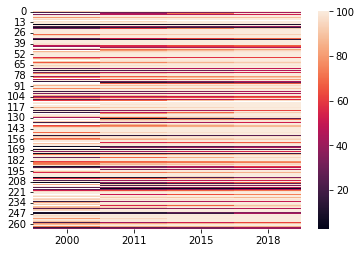

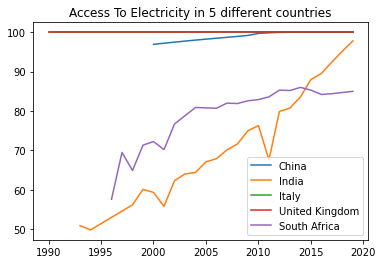

In [3]:
#data = pd.read_csv("AccesstoElectriccity.csv")




def get_year_country_df(filename):
    """method to create  two dataframes with year and country as columns.It accepts excel file and 
    and returns two dataframes"""
    df_year=''
    df_country=''
    data = pd.read_excel(filename, header=None,dtype=str,index_col=False)
    data.head()
    data.dropna(thresh=5)
    df = data[3:]
    headers = df.iloc[0]
    df1  = pd.DataFrame(df.values[1:], columns=headers)
    df1.columns.name = ''
    df_year = df1.drop(['Indicator Name','Indicator Code'] ,axis=1)
    df_year.columns
    #df_year
    # dataframe with country as columns#
    df_country=df_year.T
    headers1 = df_country.iloc[:1]
    headers1
    df_country.columns=df_country.iloc[0]
    df_country.columns.name = ''
    df_country = df_country[2:]#rows after country code row
    return df_year,df_country


year, country = get_year_country_df("AccesstoElectricity.xls")
#print("country  country ::" ,country)

print(sns.heatmap(year[["2000","2011","2015","2018"]].astype('float')))
#country = country[1:] 
country[["China", "India", "Italy","United Kingdom","South Africa"]].astype('float').plot(title='Access To Electricity in 5 different countries')


dataaaa 
2009      2757.69141158545
2010    2742.8771822219073
2011     2689.684337213148
2012     2683.367934807765
2013    2512.1059192456805
Name: 70, dtype: object


data              Country Name                2014                2015  \
5                 Albania  12.756644440470414  13.454824150557778   
8    United Arab Emirates  21.568627450980394  21.630094043887148   
13              Australia  0.6306503606883124  0.6173463671905297   
70                  Spain  14.402889607946424  13.539856640264897   
184              Pakistan  51.279929383206444   51.73747306778631   

                   2016                2017                2018  
5      14.3014301430143  14.625622551170434  14.990447848146763  
8    21.834288692027098  21.834288692027098   21.40144073346431  
13   0.6266746837438194  0.6034902390025737  0.6402986946042714  
70   13.759770346878247  13.933546880401346  14.145419482054377  
184   50.55443822362342   49.23925087155096  53.223140495867774  


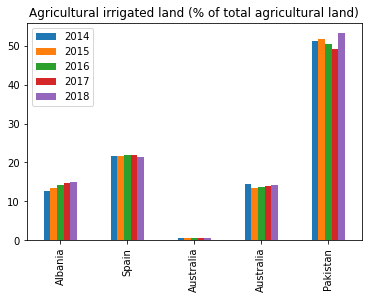

In [13]:

year_agri_irrig, country_agri_irrig = get_year_country_df("AgriIrrigatedLand.xls")

year_agri_irrig
# 5 year data 2014 to 2018 Agricultural irrigated land 
data = year_agri_irrig[["Country Name","2014", "2015", "2016","2017","2018"]]
data
df2 = data.loc[(data["Country Name"] == "Albania") | (data["Country Name"] == "Spain") | 
         (data["Country Name"] == "Australia") | (data["Country Name"] == "Pakistan") | (data["Country Name"] == "United Arab Emirates")]
print("data",df2)
x=range(5)
df2.iloc[: , 1:].astype('float').plot.bar(title='Agricultural irrigated land (% of total agricultural land)')
plt.xticks(x, ['Albania','Spain','Australia','Australia','Pakistan'], rotation='vertical')
plt.show()




       Country Name                2009                2010  \
13        Australia    5862.55194383105   5793.116025735586   
40            China  1778.4335186214564   1954.722556168961   
70            Spain    2757.69141158545  2742.8771822219073   
81   United Kingdom   3145.585662082845   3230.615983576554   
109           India   544.6265972936674   561.6534058698909   
119           Japan   3678.511132630987  3893.2666042008277   

                   2011                2012                2013  
13   5745.2321895446485   5575.287093278565   5468.391368795979  
40   2085.0830216314075   2149.602569063425  2204.2432990522575  
70    2689.684337213148   2683.367934807765  2512.1059192456805  
81    2972.153064529668   3042.859871038112   2987.700588787102  
109   577.9944262903107   599.1556197800442   605.7940377583726  
119  3610.8121690017447  3537.3631698125037   3567.629353838911  
Statistics for Australia
average:  5688.915724237166
std. deviations: 145.41061926023337
skewnes

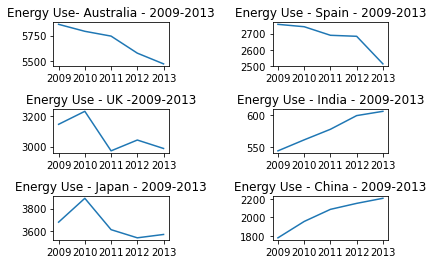

In [53]:
year_energyuse, country_energyuse = get_year_country_df("Energyuse.xls")
year_energyuse.head()


def energy_stats(dist):
    """ Prints moments of distribution dist. Uses numpy and scipy.stats"""
    print("average: ", np.average(dist))
    print("std. deviations:", np.std(dist))
    print("skewness: ", stats.skew(dist))
    print("kurtosis: ", stats.kurtosis(dist))
    return


data_stats = year_energyuse[["Country Name","2009", "2010", "2011","2012","2013"]]
data_stats
df_stats = data_stats.loc[(data_stats["Country Name"] == "Australia") | (data_stats["Country Name"] == "India") | 
         (data_stats["Country Name"] == "United Kingdom") | (data_stats["Country Name"] == "Japan")
         | (data_stats["Country Name"] == "Spain") |  (data_stats["Country Name"] == "China")]
print(df_stats)

#Energy use - use of primary energy  statistics of 5 countries between 2009 and 2013
print("Statistics for Australia")
data_aus = df_stats.iloc[0, 1:6].astype('float')
energy_stats(data_aus)
print()

print("Statistics for China")
data_chn = df_stats.iloc[1, 1:6].astype('float')
energy_stats(data_chn)
print()

print("Statistics for Spain")
data_spain = df_stats.iloc[2, 1:6].astype('float')
energy_stats(data_spain)
print()

print("Statistics for United Kingdom")
data_uk = df_stats.iloc[3, 1:6].astype('float')
energy_stats(data_uk)
print()

print("Statistics for India")
data_ind = df_stats.iloc[4, 1:6].astype('float')
energy_stats(data_ind)
print()

print("Statistics for Japan")
data_japan = df_stats.iloc[5, 1:6].astype('float')
energy_stats(data_japan)
print()

plt.figure()
plt.subplots_adjust(wspace=0.9,hspace=1)
plt.subplot(3, 2, 1)
plt.plot(data_aus,label="Aus-2009 to 2013")
plt.title("Energy Use- Australia - 2009-2013")


plt.subplot(3, 2, 2)
plt.plot(data_spain,label="Spain-2009 to 2013")
plt.title("Energy Use - Spain - 2009-2013")

plt.subplot(3, 2, 3)
plt.plot(data_uk,label="UK-2009 to 2013")
plt.title("Energy Use - UK -2009-2013")

plt.subplot(3, 2, 4)
plt.plot(data_ind,label="India-2009 to 2013")
plt.title("Energy Use - India - 2009-2013")

plt.subplot(3, 2, 5)
plt.plot(data_japan,label="Japan-2009 to 2013")
plt.title("Energy Use - Japan - 2009-2013")

plt.subplot(3, 2, 6)
plt.plot(data_chn,label="China-2009 to 2013")
plt.title("Energy Use - China - 2009-2013")
plt.show()


#energy_stats(df_stats.iloc[1, 200].astype('float'))